<a href="https://colab.research.google.com/github/marcool5/Cyber/blob/main/Exploratory_Data_and_Analysis_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first step in this experimental lab is that we must begin is to understand the dataset model that we will be using for this researh in order to be start with the data analysis and use of machine learning models that help us generate more accurate results by using training models.
The dataset that we will be analysing is UNSW-NB15 (University of New South Wales - Network Behavior 2015). This dataset is used as an analysis data load for cybersecurity research on the artifacts that are part of a network infrastructure.

Objective:
This dataset is intended for analysing cybersecurity-related studies and network intrusion detection systems (NIDS). It includes network traffic information to model different network threats.
Data Scheme:
The UNSW-NB15 dataset is in the CSV file format, which makes analysis and machine learning easy. Significant files are:
The core dataset containing a variety of attributes taken from network traffic data is contained in UNSW-NB15_1.csv. Every row represents a network link or flow.
The "attack types" for each network flow in the primary dataset are contained in UNSW-NB15_2.csv. Network flows and certain attack categories are connected in this file.
Typical aspects of the primary dataset (UNSW-NB15_1.csv) include the following data fields.


In [1]:
#Import modules and libraries
!pip install tensorflow
!pip install keras
import pandas as pd
from pandas.core.series import Axis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import joblib
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# sklearn for train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from collections.abc import Iterable
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Embedding
from keras.optimizers import Adam
from sklearn.datasets import load_iris
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_testing-set.csv')

# Dataset Discovery

In [2]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,srcip,sport,dstip,dsport,service.1
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,Normal,0,NaN,0,0,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,6,0,Normal,0,NaN,0,0,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,2,6,0,Normal,0,NaN,0,0,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,2,1,0,Normal,0,NaN,0,0,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,2,39,0,Normal,0,NaN,0,0,0,0


In [3]:
data.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 50 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
data.isnull().sum()

id                        0
dur                       0
proto                     0
service                   0
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [6]:
print('The dataset contans a total of {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset contans a total of 175341 rows and 50 columns


In [7]:
data_to_use=data.isnull().sum()
data_to_use.shape

(50,)

In the following scatter plot diagram we'll respresent a attack duration in X for each attack category represented in Y.

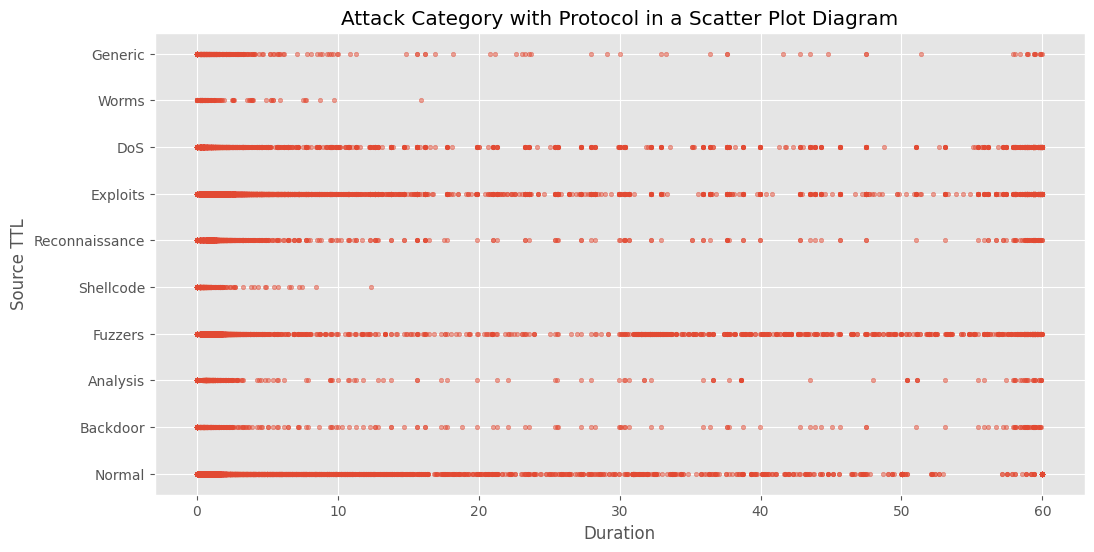

In [8]:
x = data['dur']
y = data['attack_cat']
# Print scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=10, alpha=0.5)
plt.xlabel('Duration')
plt.ylabel('Source TTL')
plt.title('Attack Category with Protocol in a Scatter Plot Diagram')
plt.show()

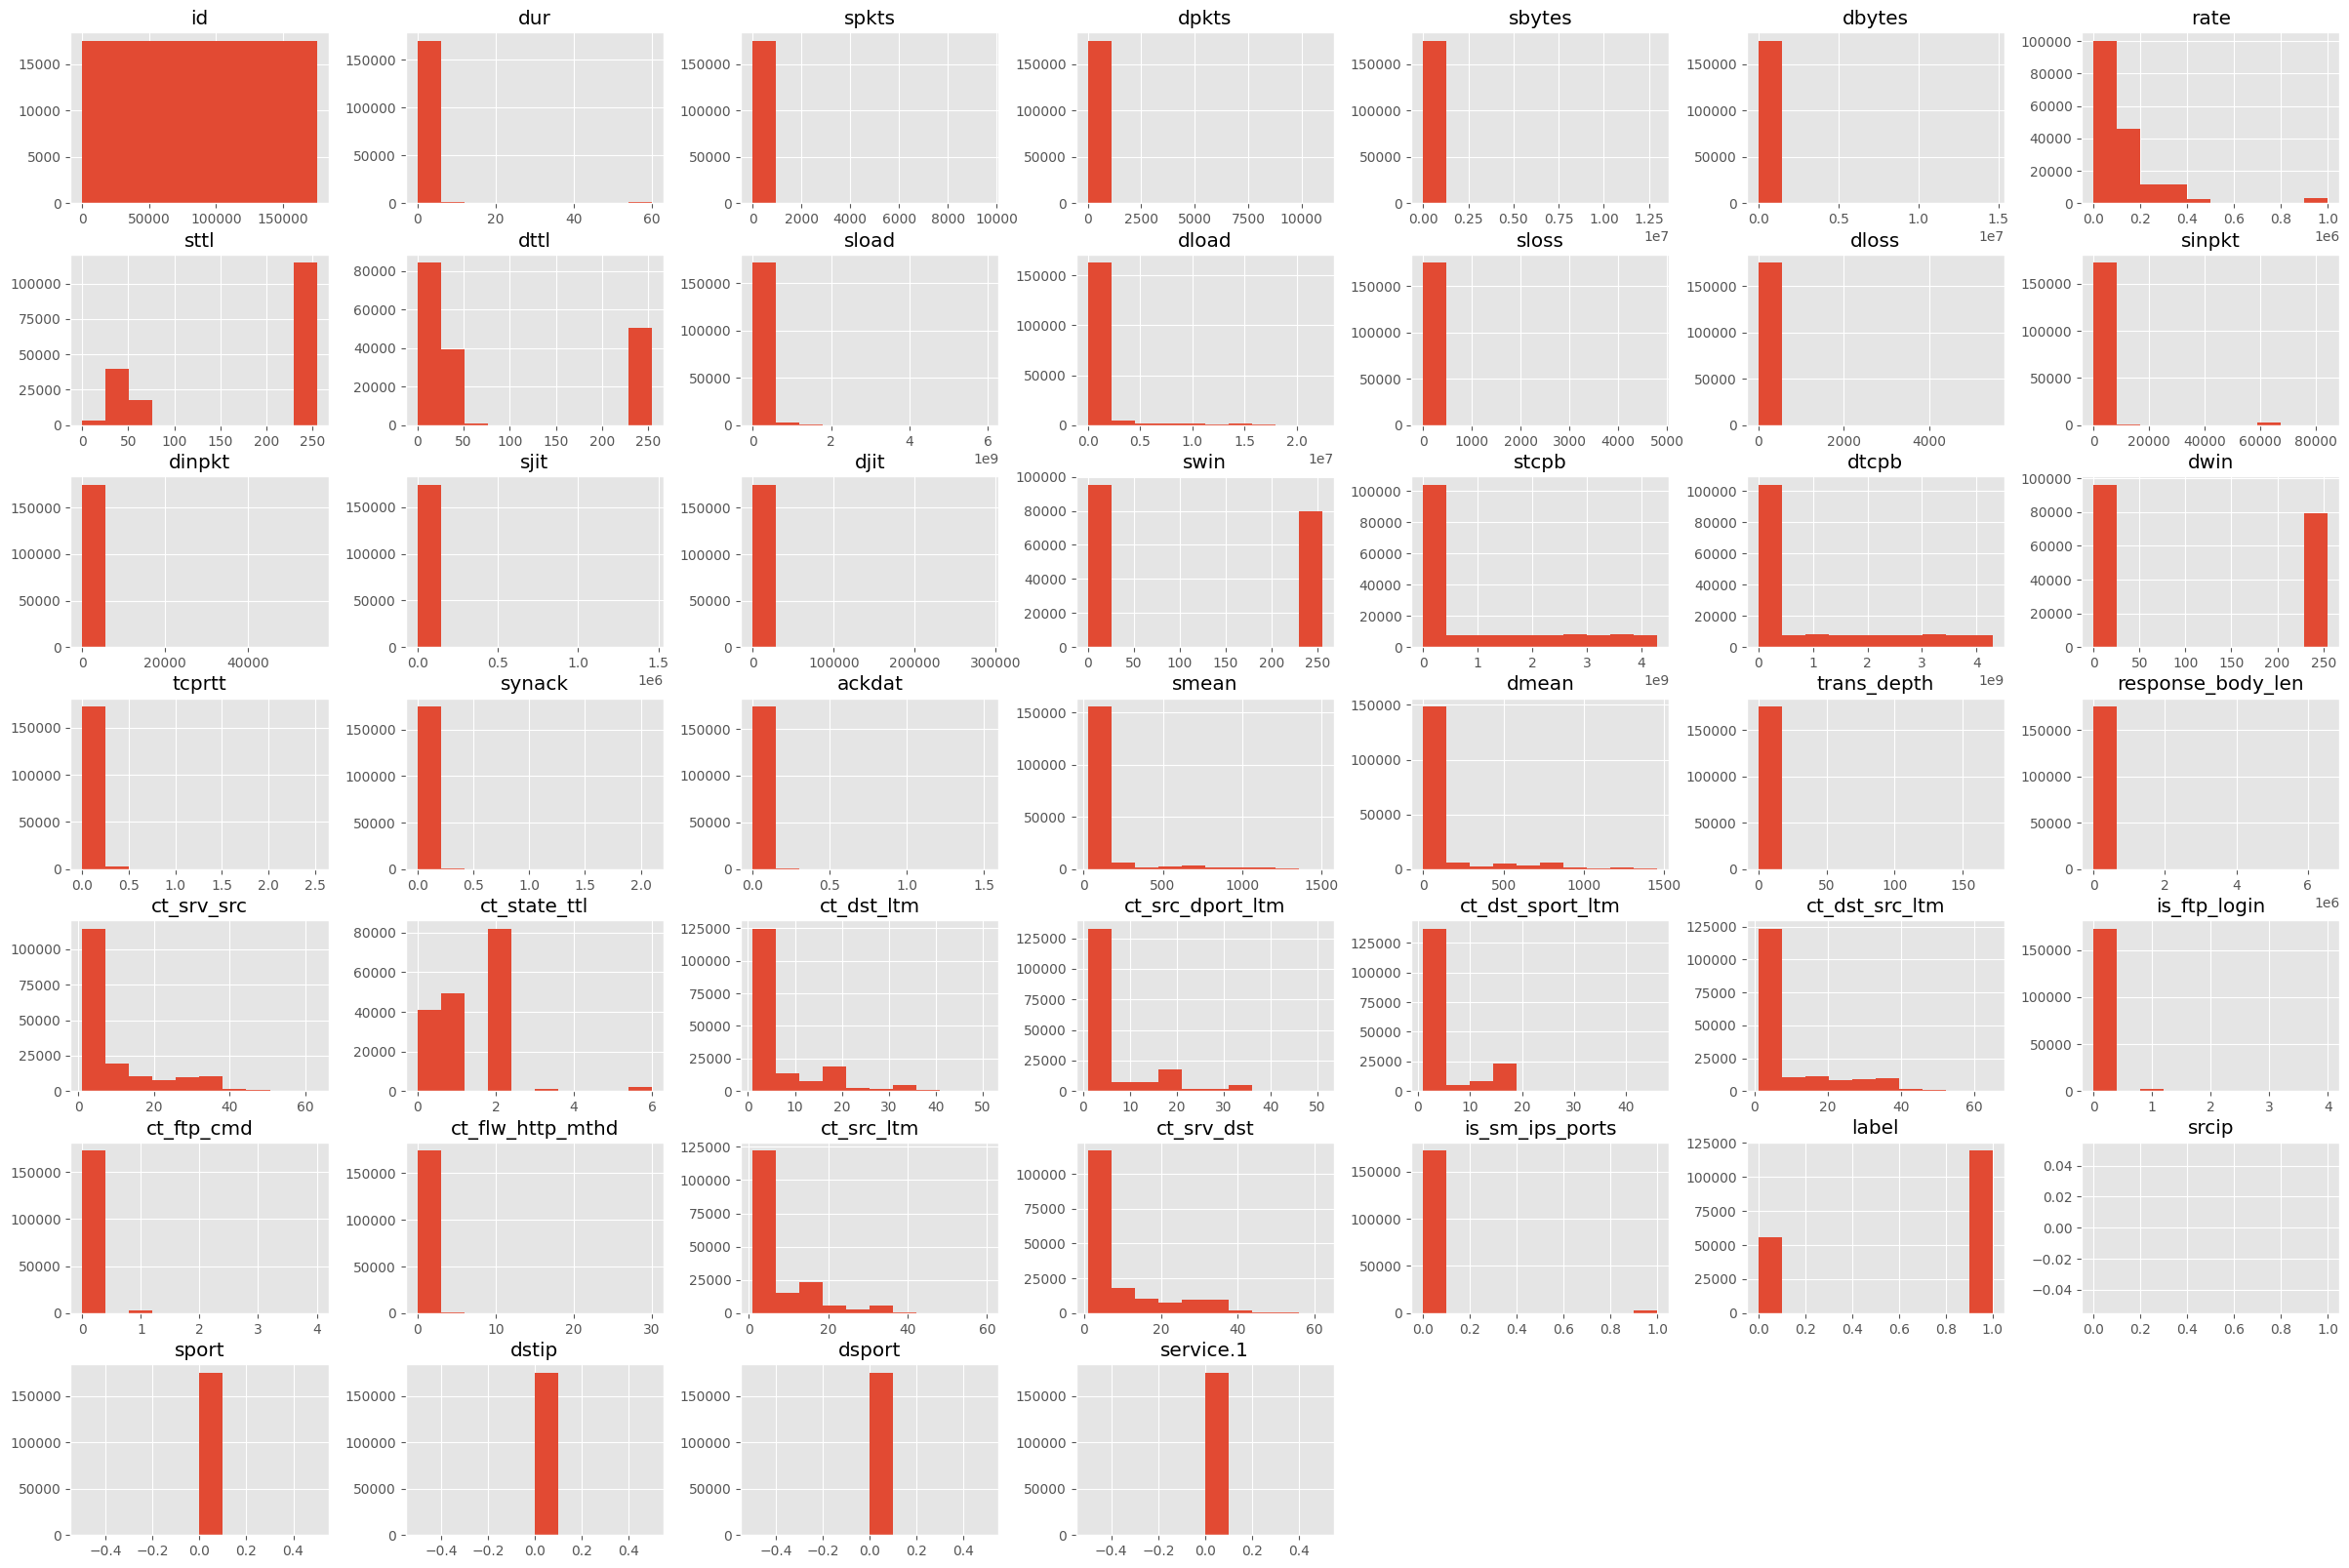

In [9]:
data.hist(figsize=(30,20));

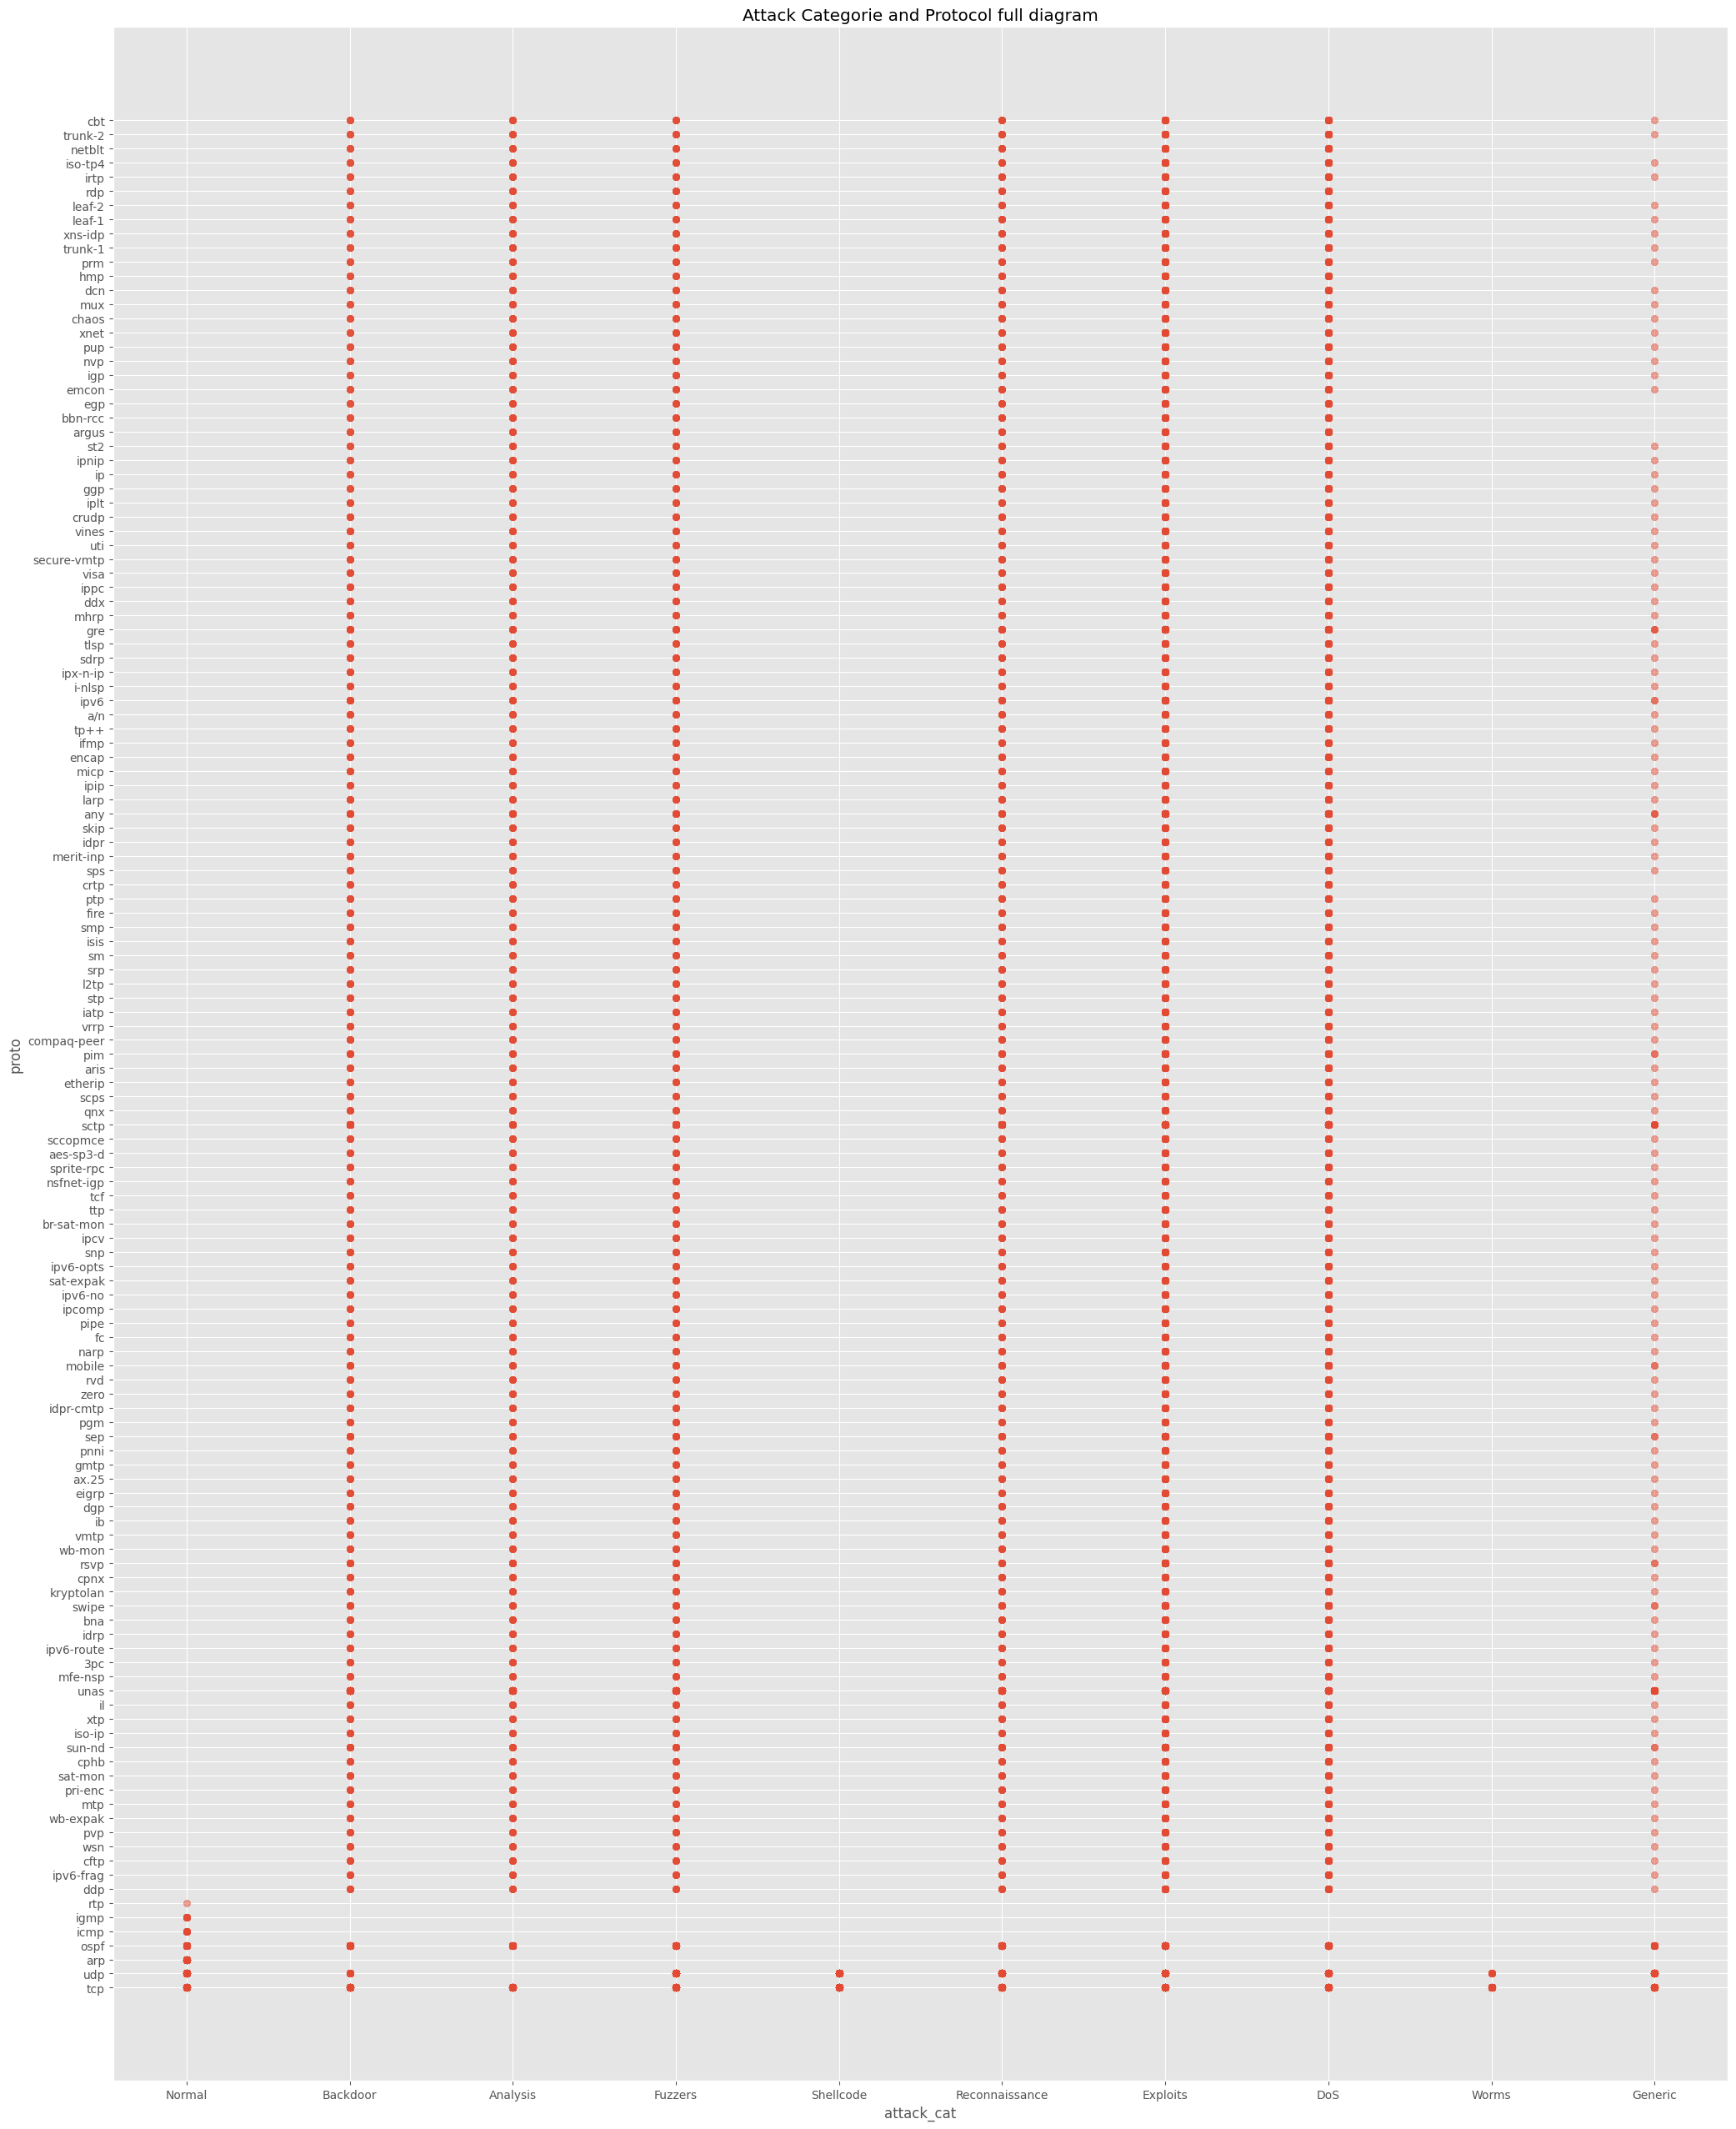

In [10]:
x_column = 'attack_cat'
y_column = 'proto'
plt.figure(figsize=(25, 32))
plt.scatter(data[x_column], data[y_column], alpha=0.5)
plt.title('Attack Categorie and Protocol full diagram')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

In  the following analysis we will use the "Attack Category" column belonging to the UNSW_NB15_training-set_v1.csv dataset. This diagram use bars to be represent a total (count) of records that are reported in the dataset for each type of attack.


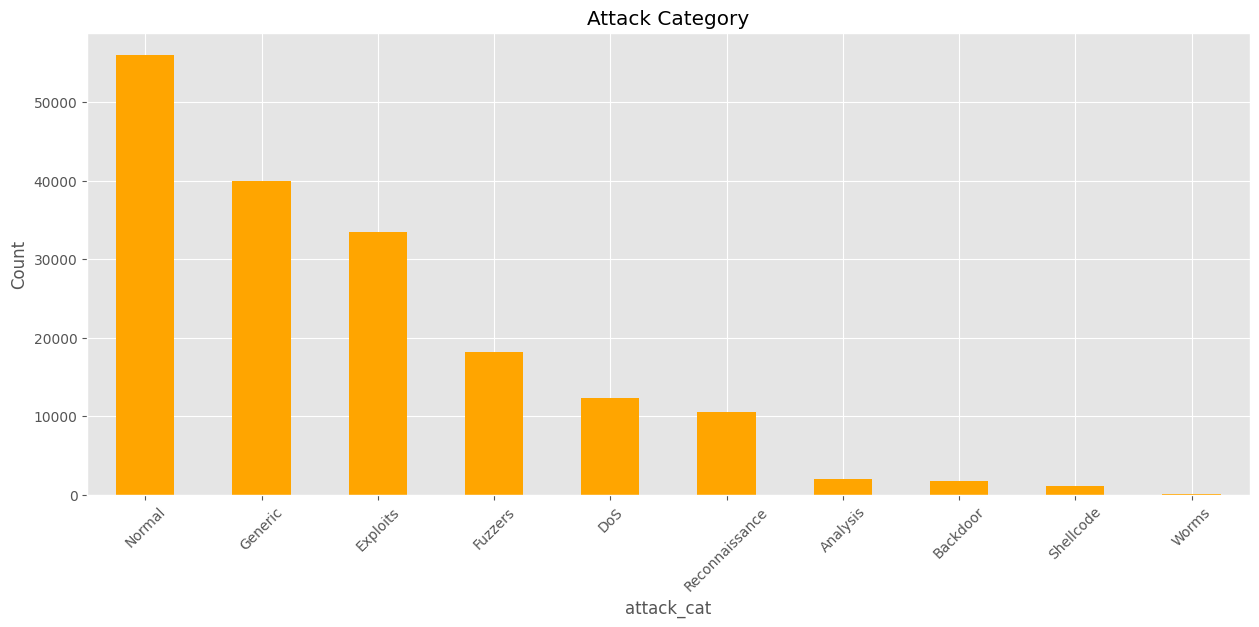

In [11]:
category_column = 'attack_cat'
grouped_data = data[category_column].value_counts()
plt.figure(figsize=(15, 6))
grouped_data.plot(kind='bar', color='orange')
plt.title('Attack Category')
plt.xlabel(category_column)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Machine Learning

For a pre-training using a Machine Learning the first step was created a pre-training model using machine learning models for the dataset that was selected for this research. In this case the dataset utilized is: UNSW_NB15_Training.
We loaded the UNSW-NB15 training dataset and applied data preprocessing to it in a manner akin to that used for the testing dataset.
For the data use we divided the training data into target labels (y_train) and feature (X_train) categories.
Using the training set of data with the build a Random Forest classifier and train it.
Using joblib.dump(), we store the trained model to a file called "**traning_model.pkl**"
Following the execution of this code, a pre-trained Random Forest model will be saved in the "random_forest_model.pkl" file. This file can load and use to make predictions on the testing dataset as demonstrated in the preceding responses.

In [12]:
# Load the UNSW-NB15 training dataset
train_data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')
# Drop the unnecessary columns.
train_data = train_data.drop(columns=['proto', 'state', 'service','attack_cat'],axis=1)
train_data = train_data.fillna(0)
# Separate features (X_train) and target labels (y_train)
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
# Create and train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Save the trained model to a file using joblib
model_filename = 'traning_model.pkl'
joblib.dump(clf, model_filename)
print(f"model saved as '{model_filename}'.")

model saved as 'traning_model.pkl'.


In [13]:
test_data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')
test_data = test_data.drop(columns=['proto', 'state', 'service',  'attack_cat'],axis=1)
test_data = test_data.fillna(0)
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']
clf = joblib.load('traning_model.pkl')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[37000     0]
 [    0 45332]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37000
           1       1.00      1.00      1.00     45332

    accuracy                           1.00     82332
   macro avg       1.00      1.00      1.00     82332
weighted avg       1.00      1.00      1.00     82332



To complete a prediction sequence task in the following section is produce a  sample data.
A Stacked LSTM model with two LSTM layers that each return sequences (return_sequences=True) is defined and trained.

Epoch 1/10
1647/1647 [==============================] - 25s 9ms/step - loss: -4.8080 - accuracy: 0.0071 - val_loss: -11.0686 - val_accuracy: 0.0069
Epoch 2/10
1647/1647 [==============================] - 12s 7ms/step - loss: -19.8787 - accuracy: 0.0071 - val_loss: -30.3490 - val_accuracy: 0.0069
Epoch 3/10
1647/1647 [==============================] - 13s 8ms/step - loss: -45.0302 - accuracy: 0.0071 - val_loss: -62.0993 - val_accuracy: 0.0069
Epoch 4/10
1647/1647 [==============================] - 18s 11ms/step - loss: -86.0929 - accuracy: 0.0071 - val_loss: -112.7978 - val_accuracy: 0.0069
Epoch 5/10
1647/1647 [==============================] - 13s 8ms/step - loss: -145.7138 - accuracy: 0.0071 - val_loss: -179.0585 - val_accuracy: 0.0069
Epoch 6/10
1647/1647 [==============================] - 13s 8ms/step - loss: -214.2846 - accuracy: 0.0071 - val_loss: -247.2402 - val_accuracy: 0.0069
Epoch 7/10
1647/1647 [==============================] - 13s 8ms/step - loss: -279.6651 - accuracy: 0.

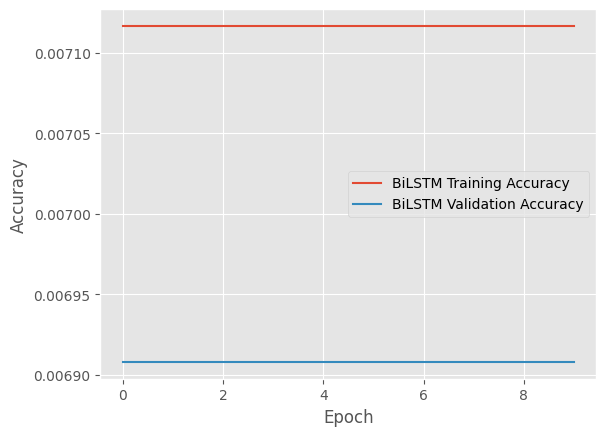

515/515 [==============================] - 2s 4ms/step - loss: -1266.5698 - accuracy: 0.0071
BiLSTM Accuracy: 0.007105119526386261


In [8]:
data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')
X = data.drop(columns=['proto','service','state', 'dur','ct_src_ltm', 'ct_dst_ltm','sbytes','dbytes','rate','attack_cat'])
# Target
y = data['attack_cat']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[2])))
model_lstm.add(LSTM(units=64, return_sequences=True))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(0.001, clipnorm=1.)

model_lstm.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
accuracy_lstm = model_lstm.evaluate(X_test, y_test)[1]
print(f"LSTM Accuracy: {accuracy_lstm}")
# BiLSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(1, X_train.shape[2])))
model_bilstm.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model_bilstm.add(Bidirectional(LSTM(units=64)))
model_bilstm.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(0.001, clipnorm=1.)
model_bilstm.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
accuracy_bilstm = model_bilstm.evaluate(X_test, y_test)[1]
print(f"BiLSTM Accuracy: {accuracy_bilstm}")

# Train BiLSTM model
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training history for BiLSTM
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM Training Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate BiLSTM model
accuracy_bilstm = model_bilstm.evaluate(X_test, y_test)[1]
print(f"BiLSTM Accuracy: {accuracy_bilstm}")


Epoch 1/10
2192/2192 [==============================] - 11s 4ms/step - loss: 0.3923 - accuracy: 0.8149
Epoch 2/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.3388 - accuracy: 0.8484
Epoch 3/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.3098 - accuracy: 0.8732
Epoch 4/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2988 - accuracy: 0.8823
Epoch 5/10
2192/2192 [==============================] - 7s 3ms/step - loss: 0.2937 - accuracy: 0.8843
Epoch 6/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2899 - accuracy: 0.8874
Epoch 7/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2867 - accuracy: 0.8903
Epoch 8/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2842 - accuracy: 0.8921
Epoch 9/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2821 - accuracy: 0.8928
Epoch 10/10
1096/1096 [==============================] - 3s 2ms/step - loss: 0.28

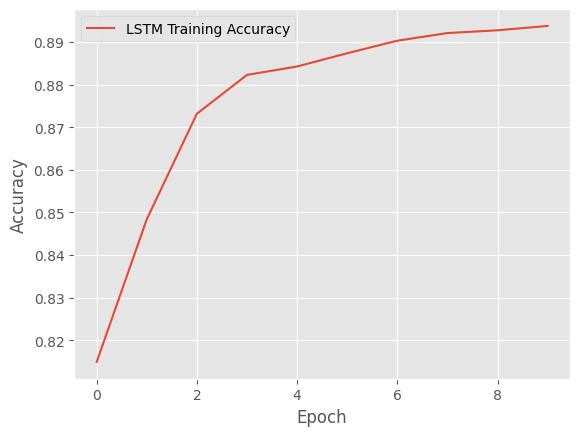

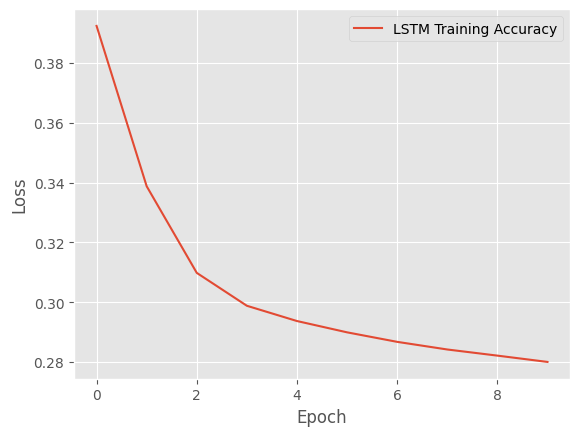

1096/1096 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8893
Stacked LSTM Loss: 0.2846, Accuracy: 0.8893


In [16]:
# Select features and target
selected_features = ['dur', 'sbytes', 'dbytes', 'rate']
X = data[selected_features].values
y = data['label'].values
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
# Evaluate the model on the test set
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Stacked LSTM Loss: {loss_lstm:.4f}, Accuracy: {accuracy_lstm:.4f}")
# Plot training history
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot training history for loss
plt.plot(history_lstm.history['loss'], label='LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Stacked LSTM Loss: {loss_lstm:.4f}, Accuracy: {accuracy_lstm:.4f}")

Epoch 1/10
2192/2192 [==============================] - 11s 4ms/step - loss: 0.3912 - accuracy: 0.8158
Epoch 2/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.3383 - accuracy: 0.8471
Epoch 3/10
2192/2192 [==============================] - 7s 3ms/step - loss: 0.3116 - accuracy: 0.8717
Epoch 4/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2991 - accuracy: 0.8822
Epoch 5/10
2192/2192 [==============================] - 7s 3ms/step - loss: 0.2935 - accuracy: 0.8843
Epoch 6/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2896 - accuracy: 0.8885
Epoch 7/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2859 - accuracy: 0.8902
Epoch 8/10
2192/2192 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.8920
Epoch 9/10
2192/2192 [==============================] - 7s 3ms/step - loss: 0.2809 - accuracy: 0.8927
Epoch 10/10
1096/1096 [==============================] - 2s 1ms/step - loss: 0.28

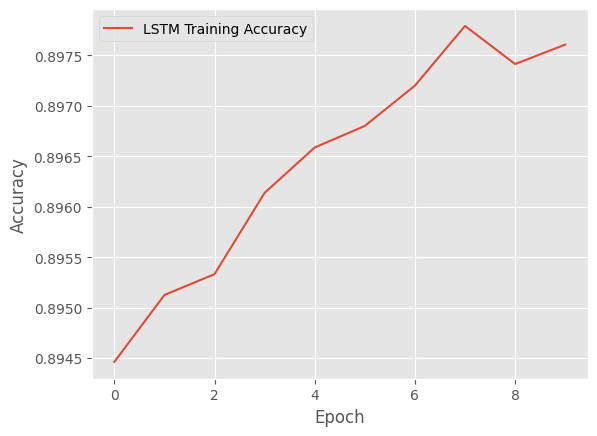

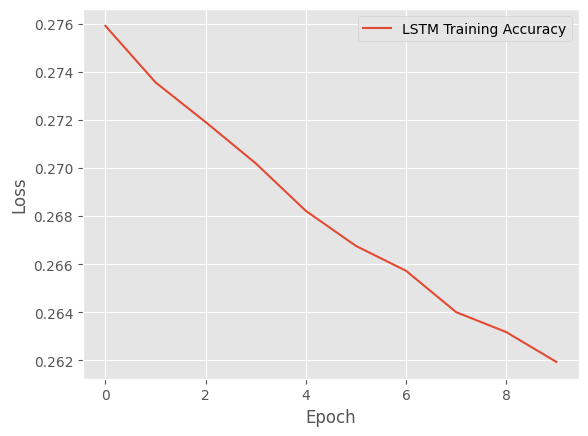

1096/1096 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.8944
Stacked LSTM Loss: 0.2657, Accuracy: 0.8944


In [17]:
selected_features = ['dur','sbytes','dbytes','rate']
X = data[selected_features].values
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Stacked LSTM Loss: {loss_lstm:.4f}, Accuracy: {accuracy_lstm:.4f}")

# Train the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Evaluate the model on the test set
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Stacked LSTM Loss: {loss_lstm:.4f}, Accuracy: {accuracy_lstm:.4f}")

# Plot training history
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training history for loss
plt.plot(history_lstm.history['loss'], label='LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Stacked LSTM Loss: {loss_lstm:.4f}, Accuracy: {accuracy_lstm:.4f}")



<ipython-input-14-de74aec392c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_data.corr()


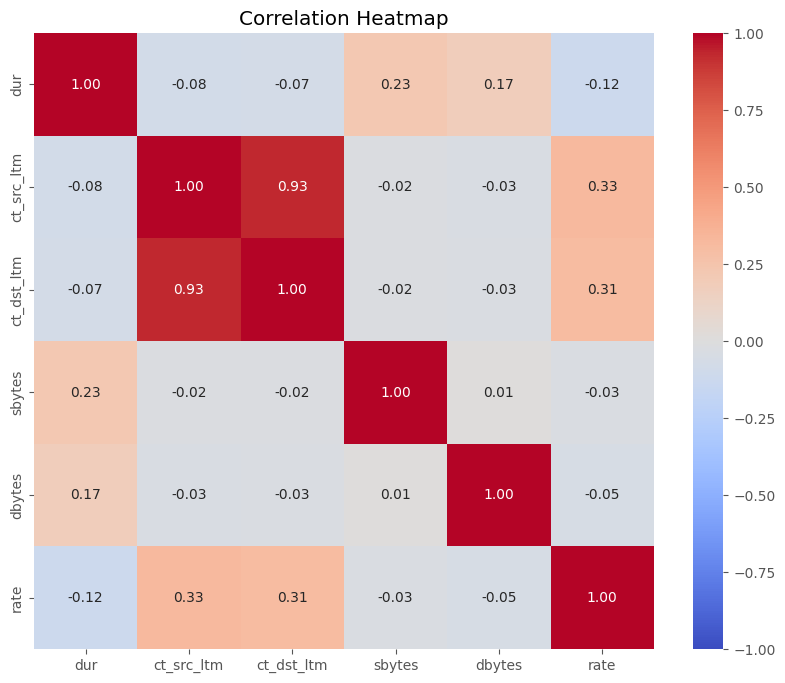

In [ ]:
subset_data = data.reindex(columns=['dur','dport', 'attack_cat'])
columns_of_interest = ['proto','service','state', 'dur','ct_src_ltm', 'ct_dst_ltm','sbytes','dbytes','rate','attack_cat']
subset_data = data[columns_of_interest]
correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  annot = True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center= 0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')
data = data.drop(columns=['proto', 'state', 'service', 'ct_src_ltm', 'ct_dst_ltm', 'attack_cat'])
data = data.fillna(0)
X = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_str)

Accuracy: 1.00

Confusion Matrix:
[[7416    2]
 [   3 9046]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [ ]:
#Import modules and libraries
!pip install tensorflow
!pip install keras
import pandas as pd
from pandas.core.series import Axis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# sklearn for train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from collections.abc import Iterable
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Embedding
from keras.optimizers import Adam
from sklearn.datasets import load_iris
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_testing-set.csv')